<a href="https://colab.research.google.com/github/tanmaytb404/CNN_MODEL/blob/main/fashion_mnits_UsingKerasTuner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras-tuner

     |████████████████████████████████| 97 kB 3.8 MB/s 


In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

**
Here we are using fashion mnist dataset. Which is available in keras only **

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

**As the images in the fashion mnist dataset are present in the form of gray scale so we can tranform into 0/1 to quickly train or test our model**

In [6]:
train_images = train_images/255.0
test_images = test_images/255.0

In [7]:
train_images[0].shape

(28, 28)

In [8]:
train_images = train_images.reshape(len(train_images),28,28,1)
test_images = test_images.reshape(len(test_images), 28,28, 1)

**Creating the CNN**

In [9]:
def build_model(hp):
  model = keras.Sequential([
                            keras.layers.Conv2D(
                                filters = hp.Int('conv_1_filter', min_value = 32, max_value = 128, step = 16),
                                kernel_size = hp.Choice('conv_1_kernel', values = [3,5]),
                                activation = 'relu',
                                input_shape = (28,28,1)
                            ),
                            keras.layers.Conv2D(
                                filters = hp.Int('conv_2_filter', min_value = 32, max_value = 64, step = 16),
                                kernel_size = hp.Choice('conv_2_kernel', values = [3,5]),
                                activation = 'relu',
                                input_shape = (28,28,1)
                            ),
                            keras.layers.Flatten(),
                            keras.layers.Dense(
                                units = hp.Int('dense_1_units', min_value = 32, max_value = 128, step = 16),
                                activation = 'relu'
                            ),
                            keras.layers.Dense(10,activation = 'softmax')
  ]) 

  model.compile(optimizer = keras.optimizers.Adam(hp.Choice('learning_rate', values = [1e-2, 1e-3])),
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])  
  return model

In [10]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameter

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  """Entry point for launching an IPython kernel.


In [11]:
tuner_search = RandomSearch(
    build_model, 
    objective='val_accuracy',
    max_trials=5, 
    directory='output', 
    project_name = 'Mnist Fashion')

In [12]:
tuner_search.search(train_images, train_labels, epochs = 3, validation_split = 0.1)

Trial 5 Complete [00h 00m 44s]
val_accuracy: 0.878333330154419

Best val_accuracy So Far: 0.9089999794960022
Total elapsed time: 00h 04m 21s
INFO:tensorflow:Oracle triggered exit


In [13]:
model = tuner_search.get_best_models(num_models=1)[0]

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 112)       2912      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 48)        134448    
_________________________________________________________________
flatten (Flatten)            (None, 19200)             0         
_________________________________________________________________
dense (Dense)                (None, 80)                1536080   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                810       
Total params: 1,674,250
Trainable params: 1,674,250
Non-trainable params: 0
_________________________________________________________________


In [16]:
model_history = model.fit(train_images, train_labels, epochs = 10, validation_split=0.1, initial_epoch=3)

Epoch 4/10
1688/1688 [==============================] - 16s 10ms/step - loss: 0.0403 - accuracy: 0.9856 - val_loss: 0.5237 - val_accuracy: 0.9062
Epoch 5/10
1688/1688 [==============================] - 16s 10ms/step - loss: 0.0343 - accuracy: 0.9876 - val_loss: 0.5353 - val_accuracy: 0.9060
Epoch 6/10
1688/1688 [==============================] - 16s 10ms/step - loss: 0.0349 - accuracy: 0.9879 - val_loss: 0.5635 - val_accuracy: 0.9062
Epoch 7/10
1688/1688 [==============================] - 16s 10ms/step - loss: 0.0261 - accuracy: 0.9909 - val_loss: 0.5201 - val_accuracy: 0.9140
Epoch 8/10
1688/1688 [==============================] - 16s 10ms/step - loss: 0.0245 - accuracy: 0.9915 - val_loss: 0.5571 - val_accuracy: 0.9040
Epoch 9/10
1688/1688 [==============================] - 16s 10ms/step - loss: 0.0263 - accuracy: 0.9919 - val_loss: 0.6183 - val_accuracy: 0.9058
Epoch 10/10
1688/1688 [==============================] - 16s 9ms/step - loss: 0.0225 - accuracy: 0.9924 - val_loss: 0.6636 -

In [17]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [19]:
import matplotlib.pyplot as plt

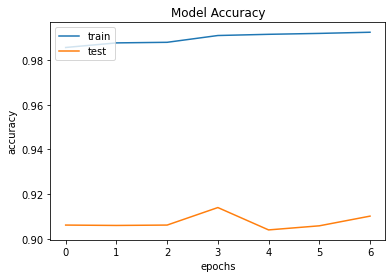

In [28]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')

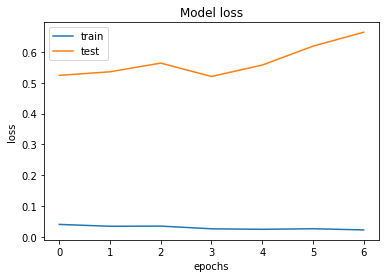

In [36]:
 # summarize history for loss
 plt.plot(model_history.history['loss'])
 plt.plot(model_history.history['val_loss'])
 plt.title('Model loss') 
 plt.ylabel('loss')
 plt.xlabel('epochs')
 plt.legend(['train', 'test'], loc='upper left')

In [47]:
print(model_history.history['accuracy'][0])

0.9855740666389465
